In [150]:
## import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [244]:
## import libraries for sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB



In [333]:
## let's try these libraries as well
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report

In [152]:
## load all the datasets
gender_titanic_data = pd.read_csv('gender_submission.csv')
test_titanic_data = pd.read_csv('test.csv')
train_titanic_data = pd.read_csv('train.csv')

In [153]:
gender_titanic_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [154]:
train_titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [155]:
test_titanic_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [451]:
## all the data has been seperated
## categorical variables may need to be changed to numerical
## gender data can be brought into test data, not to train the data but we can have smt to predict to have a Y_test as there is none in the test data at the moment
## so that we can make comparison betw Actual vs Predicted

In [156]:
## in test_titanic_data, the position of the insertion index number is 1, as PassengerID index is 0
## then we name the heading of the new insertion
## in gender_titanic_data, the position of the 'Survived' index number is 1, as PassengerID index is 0

test_titanic_data.insert(1, 'Survived', gender_titanic_data['Survived'])

In [157]:
## Survived data has now been inserted into test data (brought from the gender data)
test_titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [456]:
## another approach could be to concatanate the data 
## before splitting the data, I can clean the data first
## then manually split the data and feed it into my model
## can use standardization
## drop Cabin, Embarked and maybe Name
## label encoder or replace Sex - Male/Female to 0 and 1
## visualisations after cleaning the dataset
## select only one variable based on the correlation
## heatmap to see the correlation

In [158]:
test_titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [159]:
## since there are missing data in our dataset, we may either drop them or replace them
## what are the statistics of the dataset?
train_titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [160]:
## what is the mean for Age? same as above, put practice again
train_titanic_data['Age'].mean(skipna=True)

29.69911764705882

In [161]:
## what is the median for Age? - just for practice as it is already calculated above
train_titanic_data['Age'].median(skipna=True)

28.0

<function matplotlib.pyplot.show(close=None, block=None)>

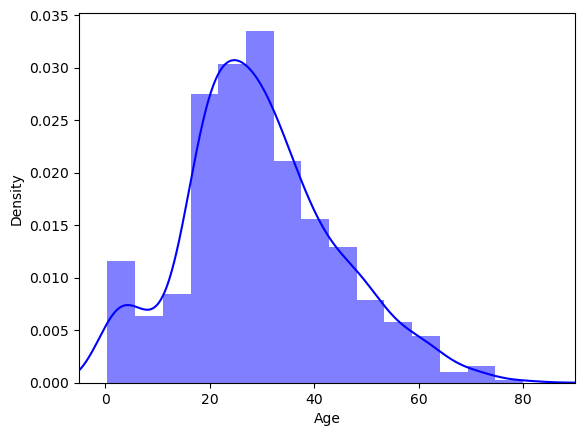

In [162]:
## check how age data looks in general
## plot histogram to se how the Age data is behaving
Age_histogram = train_titanic_data['Age'].hist(bins=15, density=True, stacked=True, color='blue', alpha=0.5)
train_titanic_data['Age'].plot(kind='density', color= 'blue')
Age_histogram.set(xlabel= 'Age')
plt.xlim(-5, 90)
plt.show

In [163]:
## there are 177 missing data from 'Age' - out of 891 values, this is almost %20 missing - so best to replace it with median
## Age plot shows that mean value will be distorting the dataset so best to use median,  median for Age is 28 - so I will replace the missing values with 28
train_titanic_data['Age'].fillna(train_titanic_data['Age'].median(skipna=True), inplace=True)

## there are 687 missing data from 'Cabin' - out of 891 values, this is around %75 missing - should we drop the whole column? or replace? how important this data for our model? - possibly better to drop this variable - so drop the variable
train_titanic_data.drop('Cabin', axis=1, inplace=True)

## there are 2 missing data from 'Embarked' - only 2 missing, insignificant so I choose to drop
train_titanic_data.drop('Embarked', axis=1, inplace=True) 

In [164]:
## check again if corrected the all missing values
train_titanic_data.isnull().sum() 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [165]:
## are there any duplicates?
train_titanic_data.drop_duplicates(inplace=True)
train_titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000


In [166]:
## check the data types
train_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 76.6+ KB


In [167]:
## do I need 'Name' and 'Ticket'? drop them
train_titanic_data.drop('Name', axis=1, inplace=True) 
train_titanic_data.drop('Ticket', axis=1, inplace=True)

In [168]:
train_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [169]:
## decide to do with 'sex' - convert to numbers
## used encoder to transform into 0s and 1s  - but didn't change so just create a new variable and and replaced it with sex

train_titanic_data['Sex_e'] = train_titanic_data['Sex'].replace({'male': 0, 'female': 1})


In [170]:
## now drop 'Sex' variable from the dataset
train_titanic_data.drop('Sex', axis=1, inplace=True)

In [171]:
train_titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_e
0,1,0,3,22.0,1,0,7.2500,0
1,2,1,1,38.0,1,0,71.2833,1
2,3,1,3,26.0,0,0,7.9250,1
3,4,1,1,35.0,1,0,53.1000,1
4,5,0,3,35.0,0,0,8.0500,0


In [172]:
## now all our data types are the numerical
train_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_e        891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [173]:
## now check X_test data, to streamline the data same as X_train
test_titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [174]:
## as we have already dropped 'Name', 'Cabin', 'Embarked', 'Ticket' from our X_train data, we have to drop it from test as well
test_titanic_data.drop('Name', axis=1, inplace=True)
test_titanic_data.drop('Cabin', axis=1, inplace=True)
test_titanic_data.drop('Embarked', axis=True, inplace=True)
test_titanic_data.drop('Ticket', axis=1, inplace=True)

In [175]:
## since I dropped the Cabin variable, no need to to replace the missing values
## there are 86 missing Age data, so I will fill these with median - same as X_train data
test_titanic_data['Age'].fillna(train_titanic_data['Age'].median(skipna=True), inplace=True)

## there is o=1 missing Fare data, so I will fill it with median as well
test_titanic_data['Fare'].fillna(train_titanic_data['Fare'].median(skipna=True), inplace=True)

In [176]:
## check the duplicates
test_titanic_data.drop_duplicates(inplace=True)

In [177]:
## I now solved the missing value problem in the data
test_titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [178]:
## what about the data type?
test_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 29.4+ KB


In [179]:
## what to do with sex = if male call it 0, if female call it 1 - same as before and then drop the 'Sex' variable

test_titanic_data['Sex_e'] = test_titanic_data['Sex'].replace({'male': 0, 'female': 1})

In [180]:
## check if correctly replaced
test_titanic_data['Sex_e']

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex_e, Length: 418, dtype: int64

In [181]:
## then drop 'Sex' variable
test_titanic_data.drop('Sex', axis=1, inplace=True)

In [182]:
## check the headings again
test_titanic_data.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_e
0,892,0,3,34.5,0,0,7.8292,0
1,893,1,3,47.0,1,0,7.0000,1
2,894,0,2,62.0,0,0,9.6875,0
3,895,0,3,27.0,0,0,8.6625,0
4,896,1,3,22.0,1,1,12.2875,1


In [183]:
train_titanic_data_corr_matrix = train_titanic_data.corr()

In [184]:
train_titanic_data_corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_e
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,-0.042939
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,-0.131900
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.081163
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.114631
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.245489
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.182333
Sex_e,-0.042939,0.543351,-0.131900,-0.081163,0.114631,0.245489,0.182333,1.000000


Text(0.5, 1.0, 'Heatmap Correlation Matrix')

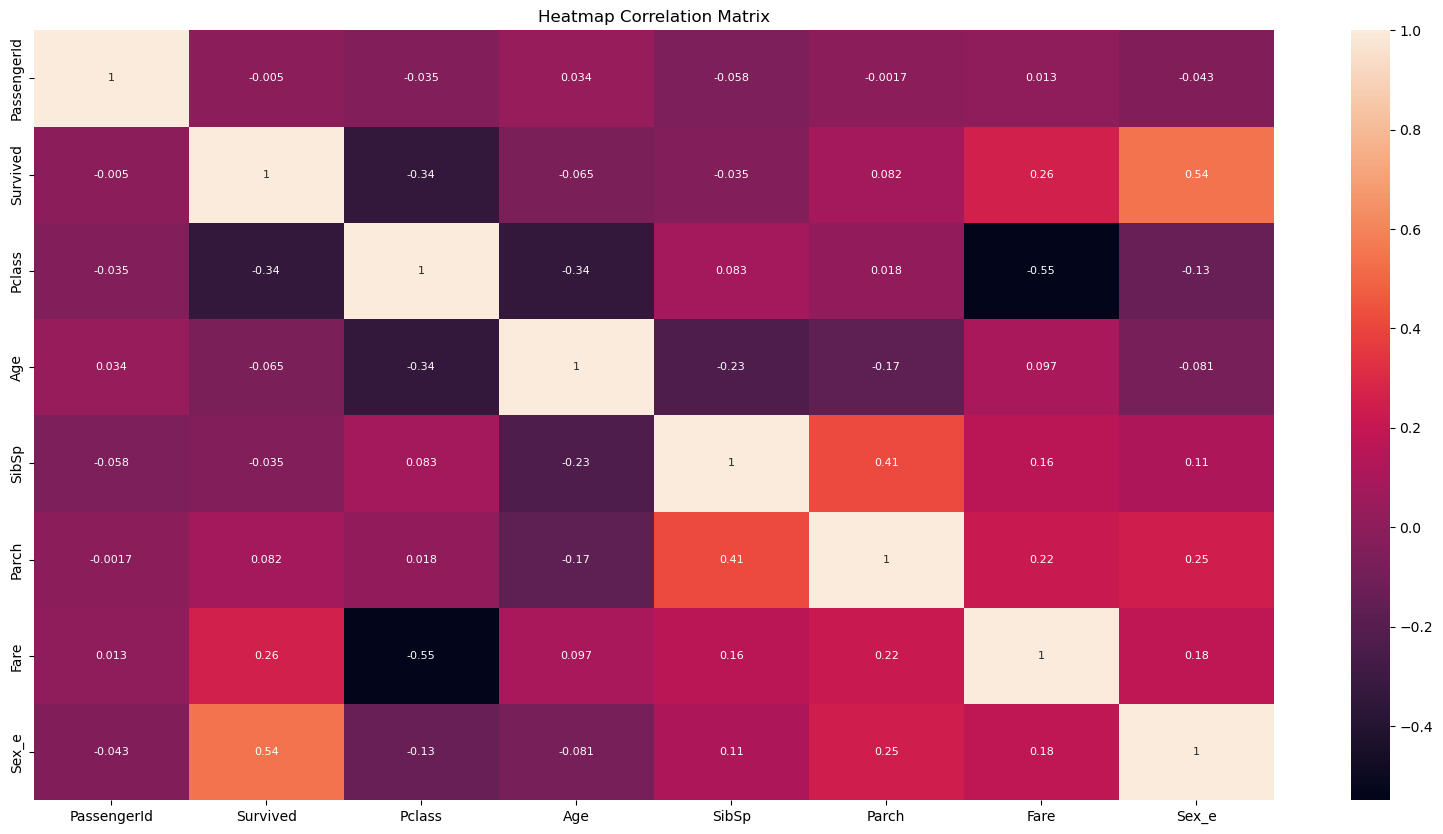

In [185]:
plt.figure(figsize=(20, 10))
sns.heatmap(train_titanic_data_corr_matrix, annot=True, annot_kws={'size': 8})
plt.title('Heatmap Correlation Matrix', loc='center')

/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_88115/1909819807.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_titanic_data['Age'][train_titanic_data.Survived == 1], color= 'blue', shade=True)
/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_88115/1909819807.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_titanic_data['Age'][train_titanic_data.Survived == 0], color='red', shade=True)


<function matplotlib.pyplot.show(close=None, block=None)>

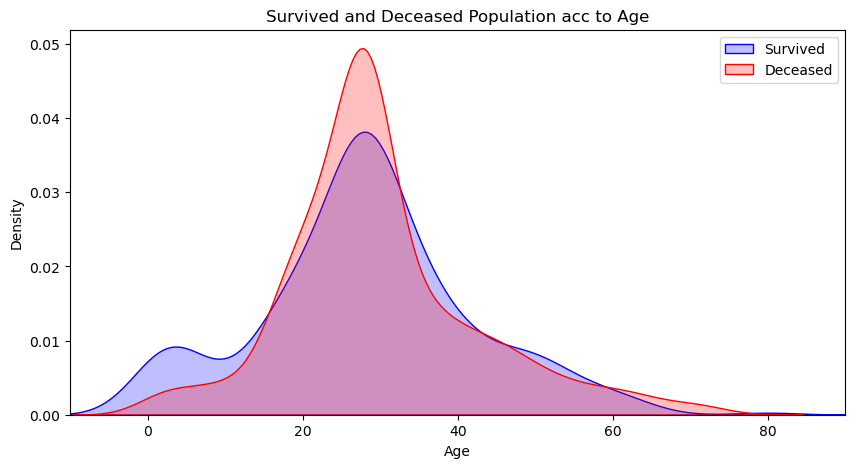

In [186]:
## now both our datasets have the same variables and both are in numerical data type
## before we model our data, will check the main predictors
## check Age vs Survived in train data

plt.figure(figsize=(10,5))

ax = sns.kdeplot(train_titanic_data['Age'][train_titanic_data.Survived == 1], color= 'blue', shade=True)
sns.kdeplot(train_titanic_data['Age'][train_titanic_data.Survived == 0], color='red', shade=True)

plt.legend(['Survived', 'Deceased'])
plt.title('Survived and Deceased Population acc to Age')
ax.set(xlabel='Age')
plt.xlim(-10, 90)
plt.show


/Users/lalebaksi/anaconda3/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Survived', ylabel='Age'>

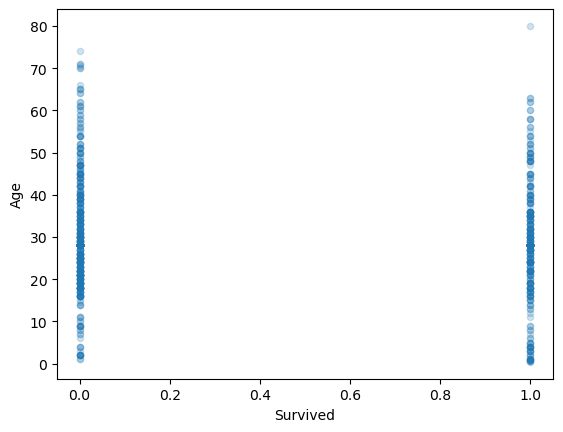

In [187]:
train_titanic_data.plot(kind='scatter', x= 'Survived', y= 'Age', colormap='RdBu', alpha=0.2)

/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_88115/214090724.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax= sns.kdeplot(train_titanic_data['Pclass'][train_titanic_data.Survived == 1], color= 'blue', shade=True)
/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_88115/214090724.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_titanic_data['Pclass'][train_titanic_data.Survived == 0], color='red', shade=True)


<function matplotlib.pyplot.show(close=None, block=None)>

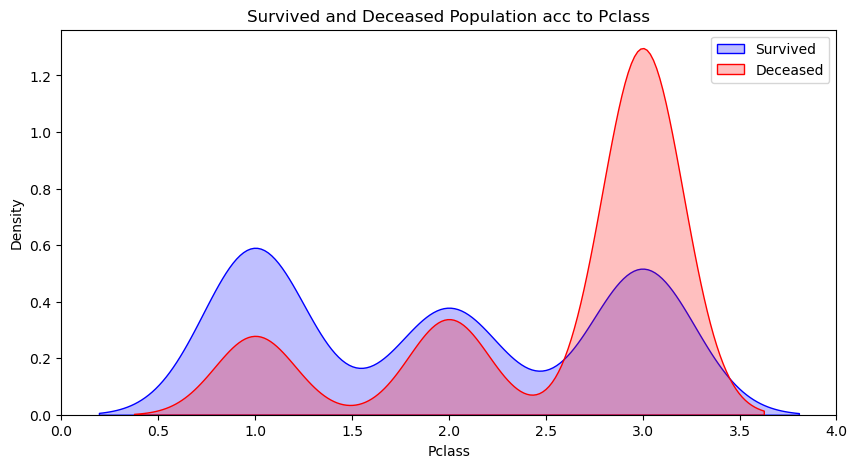

In [188]:
plt.figure(figsize=(10,5))
ax= sns.kdeplot(train_titanic_data['Pclass'][train_titanic_data.Survived == 1], color= 'blue', shade=True)
sns.kdeplot(train_titanic_data['Pclass'][train_titanic_data.Survived == 0], color='red', shade=True)
plt.show
plt.legend(['Survived', 'Deceased'])
plt.title('Survived and Deceased Population acc to Pclass')
ax.set(xlabel='Pclass')
plt.xlim(0, 4)
plt.show


In [ ]:
## the Pclass = 3 has the worst deceased rate compared to other classes
## does this mean that people has lower income has a higher rate of death? Unfortunately yes
## Pclass=3 - where is this class placed in the ship? Possibly at the bottom levels of the ship - so most difficult to escape 


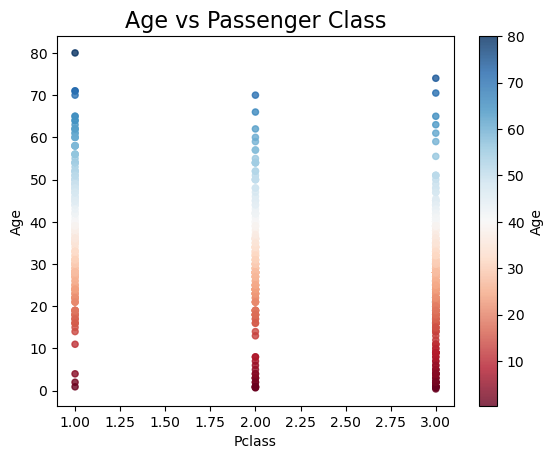

In [189]:
train_titanic_data.plot(kind='scatter', x='Pclass', y='Age', c='Age', colormap='RdBu', alpha=0.8)
plt.title('Age vs Passenger Class', fontsize=16)
plt.gca().set_facecolor('none')


In [610]:
## can I layer Age as well on Pclass and Survived plot? -- leave it to later
plt.figure(figsize=(10,5))
ax= sns.kdeplot((train_titanic_data['Pclass'][train_titanic_data.Survived == 1], color== 'blue', shade=True)(train_titanic_data['Age'][train_titanic_data.Survived == 1], color== 'green', shade=True))
sns.kdeplot((train_titanic_data['Pclass'][train_titanic_data.Survived == 0], color== 'red', shade=True)(train_titanic_data['Age'][train_titanic_data.Survived == 0], color== 'yellow', shade=True))


plt.show
plt.legend(['Survived', 'Deceased'])
plt.title('Survived and Deceased Population acc to Age and Pclass')
ax.set(xlabel='Pclass')
plt.xlim(0, 90)
plt.show

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2723043807.py, line 3)

In [190]:
## split the Age, if equal to or younger than 20, call it 'Young' and 0, otherwise 1
train_titanic_data['Young']=np.where(train_titanic_data['Age']<=20, 0, 1)

In [191]:
## make sure the Age split is reflected in test data as well
test_titanic_data['Young']=np.where(test_titanic_data['Age']<=20, 0, 1)

In [192]:
train_titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_e,Young
0,1,0,3,22.0,1,0,7.2500,0,1
1,2,1,1,38.0,1,0,71.2833,1,1
2,3,1,3,26.0,0,0,7.9250,1,1
3,4,1,1,35.0,1,0,53.1000,1,1
4,5,0,3,35.0,0,0,8.0500,0,1


In [193]:
test_titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_e,Young
0,892,0,3,34.5,0,0,7.8292,0,1
1,893,1,3,47.0,1,0,7.0000,1,1
2,894,0,2,62.0,0,0,9.6875,0,1
3,895,0,3,27.0,0,0,8.6625,0,1
4,896,1,3,22.0,1,1,12.2875,1,1


<function matplotlib.pyplot.show(close=None, block=None)>

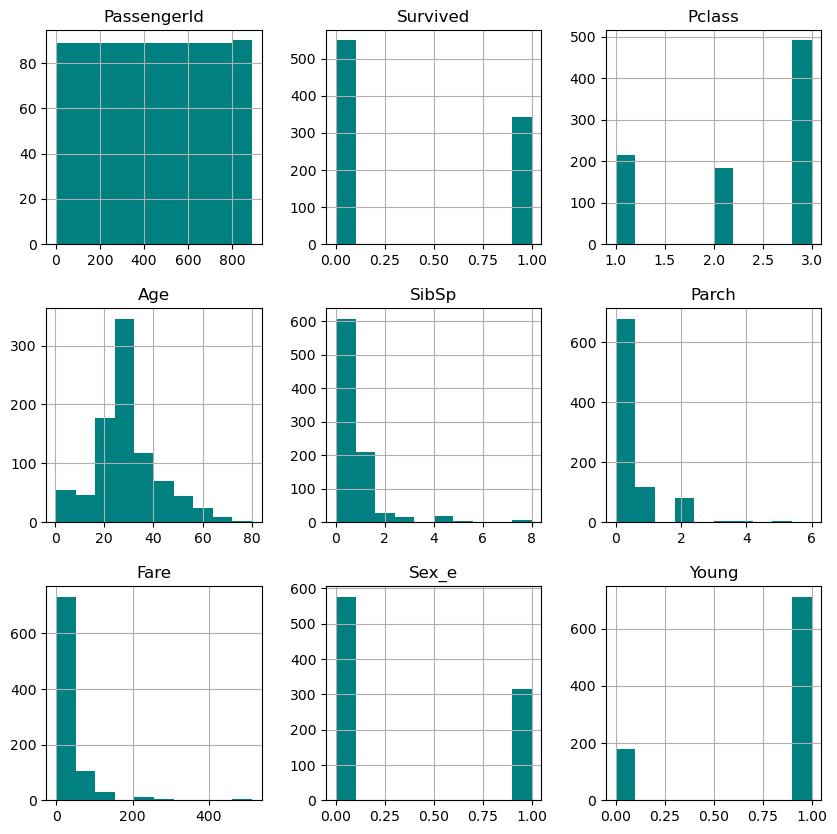

In [194]:
train_titanic_data.hist(bins=10, figsize=(10,10), color= 'teal')
plt.show

In [195]:
train_titanic_data['Young'].value_counts()

1    712
0    179
Name: Young, dtype: int64

In [196]:
train_titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [197]:
## how many 'Young' are in Pclass?
train_titanic_data[train_titanic_data['Young'] ==0]['Pclass'].value_counts()

3    123
2     35
1     21
Name: Pclass, dtype: int64

In [198]:
## how many 'Age'> 20 are in Pclass?
train_titanic_data[train_titanic_data['Young'] ==1]['Pclass'].value_counts()

3    368
1    195
2    149
Name: Pclass, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

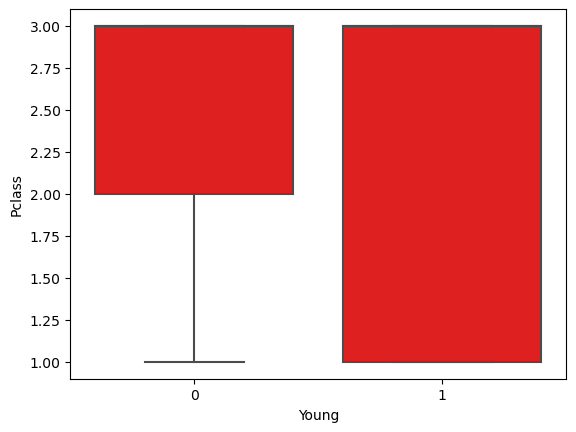

In [199]:
young_pclass_boxplot= sns.boxplot(x='Young', y= 'Pclass', data= train_titanic_data, color='Red')
plt.show

In [200]:
## how many 'Young' have Died?
train_titanic_data[train_titanic_data['Survived'] ==0]['Young'].value_counts()

1    452
0     97
Name: Young, dtype: int64

In [201]:
## how many 'Young' have Lived?
train_titanic_data[train_titanic_data['Survived'] ==1]['Young'].value_counts()

1    260
0     82
Name: Young, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

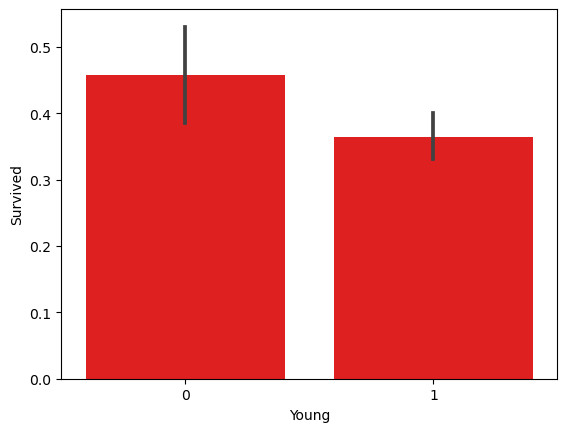

In [202]:
young_survived_barplot= sns.barplot(x='Young', y= 'Survived', data= train_titanic_data, color='Red')
plt.show

In [203]:
## how many of these people Survived?
train_titanic_data[train_titanic_data['Survived'] ==1]['Pclass'].value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [204]:
## how many of these people Died?
train_titanic_data[train_titanic_data['Survived'] ==0]['Pclass'].value_counts()

3    372
2     97
1     80
Name: Pclass, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

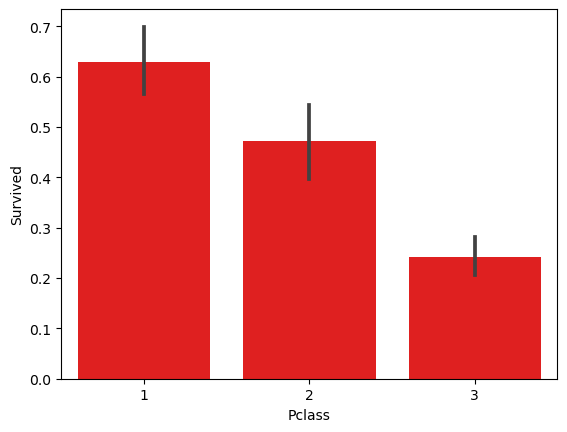

In [205]:
## check with barplot 
pclass_survived_barplot= sns.barplot(x='Pclass', y= 'Survived', data= train_titanic_data, color='Red')
plt.show

In [206]:
## what about 'Sex'? how many people were male and female within Deceased?
train_titanic_data[train_titanic_data['Survived'] ==0]['Sex_e'].value_counts()

0    468
1     81
Name: Sex_e, dtype: int64

In [207]:
## what about 'Sex'? how many people were male and female within Lived?
train_titanic_data[train_titanic_data['Survived'] ==1]['Sex_e'].value_counts()

1    233
0    109
Name: Sex_e, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

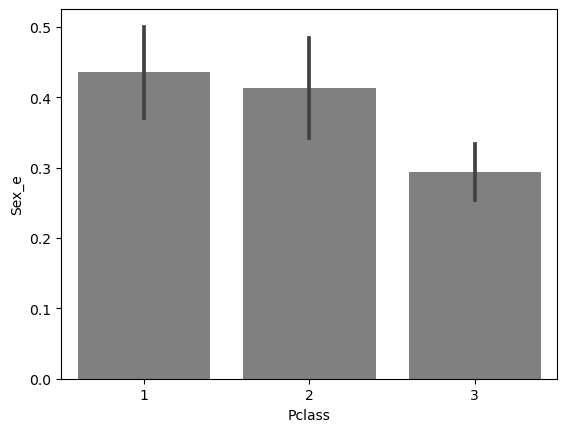

In [208]:
pclass_sex_train_barplot= sns.barplot(x= 'Pclass', y='Sex_e', data= train_titanic_data, color='Gray')
plt.show

In [ ]:
## So let's summarize our assumptions first;
## Survived= 0 if Deceased, 1 if Lived
## Sex= 0 if Male, 1 if Female
## Young= 0 if Age is=<20, 1 if Age>20

## so based on these assumptions and my analysis, the outcomes are as follows;
# Passenger class has a big impact on the Deceased - 1st class passengers have a more chance to escape and 3rd class passengers have a more unlucky chance to die
## Male passengers have a higher death rate than female passengers
## Younger passengers are more likely to survive  

In [209]:
## lastly I decided to drop  SibSp and Parch variables as well
train_titanic_data.drop('SibSp', axis=1, inplace=True)
train_titanic_data.drop('Parch', axis=1, inplace=True)
test_titanic_data.drop('SibSp', axis=1, inplace=True)
test_titanic_data.drop('Parch', axis=1, inplace=True)

In [283]:
train_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Sex_e        891 non-null    int64  
 6   Young        891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 88.0 KB


In [284]:
test_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Sex_e        418 non-null    int64  
 6   Young        418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.3 KB


In [290]:
## can I now combine my test and train data?
## make sure that it ignores the existing indices and label the index from 0 again

combined_titanic_data= pd.concat([train_titanic_data, test_titanic_data], axis=0, ignore_index=True) 

In [291]:
## let's check if datasets are combined correctly?
combined_titanic_data.head()

,PassengerId,Survived,Pclass,Age,Fare,Sex_e,Young
0,1,0,3,22.0,7.2500,0,1
1,2,1,1,38.0,71.2833,1,1
2,3,1,3,26.0,7.9250,1,1
3,4,1,1,35.0,53.1000,1,1
4,5,0,3,35.0,8.0500,0,1


In [292]:
combined_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Age          1309 non-null   float64
 4   Fare         1309 non-null   float64
 5   Sex_e        1309 non-null   int64  
 6   Young        1309 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 71.7 KB


In [293]:
## check again if there are any missing values - just in case
combined_titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
Fare           0
Sex_e          0
Young          0
dtype: int64

In [294]:
combined_titanic_data_corr_matrix = combined_titanic_data.corr()

Text(0.5, 1.0, 'Heatmap Correlation Matrix')

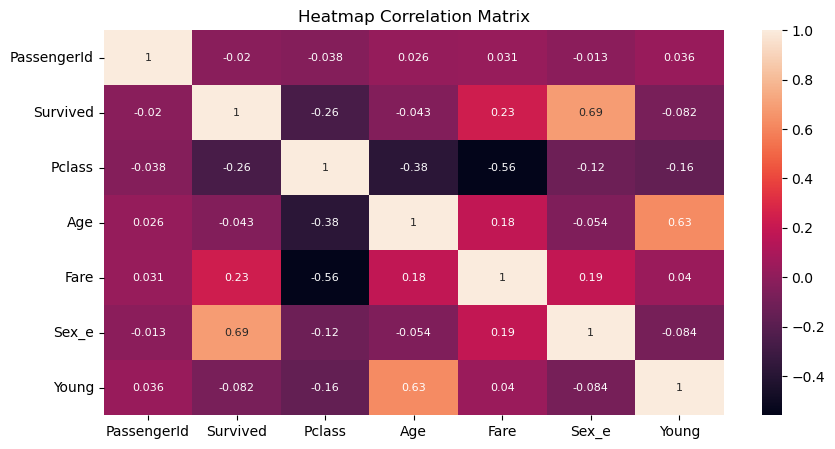

In [331]:
plt.figure(figsize=(10, 5))
sns.heatmap(combined_titanic_data_corr_matrix, annot=True, annot_kws={'size': 8})
plt.title('Heatmap Correlation Matrix', loc='center')

/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_88115/3729709882.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax= sns.kdeplot(combined_titanic_data['Pclass'][combined_titanic_data.Survived == 1], color= 'blue', shade=True)
/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_88115/3729709882.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_titanic_data['Pclass'][combined_titanic_data.Survived == 0], color='red', shade=True)


<function matplotlib.pyplot.show(close=None, block=None)>

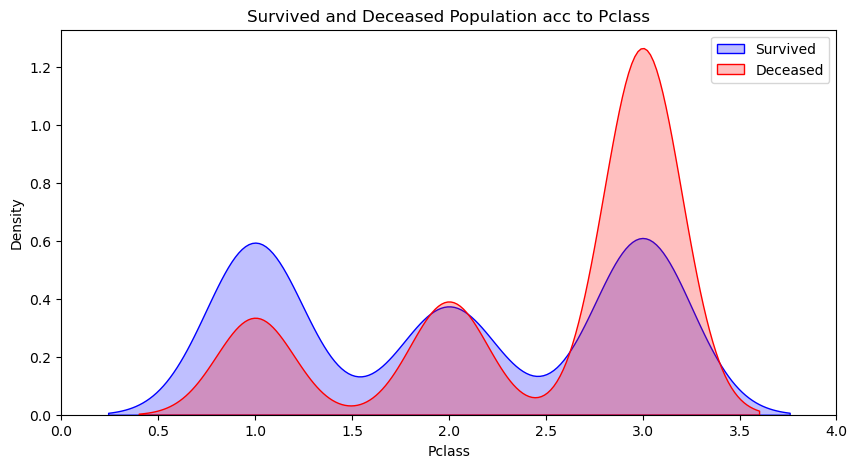

In [296]:
plt.figure(figsize=(10,5))
ax= sns.kdeplot(combined_titanic_data['Pclass'][combined_titanic_data.Survived == 1], color= 'blue', shade=True)
sns.kdeplot(combined_titanic_data['Pclass'][combined_titanic_data.Survived == 0], color='red', shade=True)
plt.show
plt.legend(['Survived', 'Deceased'])
plt.title('Survived and Deceased Population acc to Pclass')
ax.set(xlabel='Pclass')
plt.xlim(0, 4)
plt.show

/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_88115/976030660.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax= sns.kdeplot(combined_titanic_data['Fare'][combined_titanic_data.Survived == 1], color= 'blue', shade=True)
/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_88115/976030660.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_titanic_data['Fare'][combined_titanic_data.Survived == 0], color='red', shade=True)


<function matplotlib.pyplot.show(close=None, block=None)>

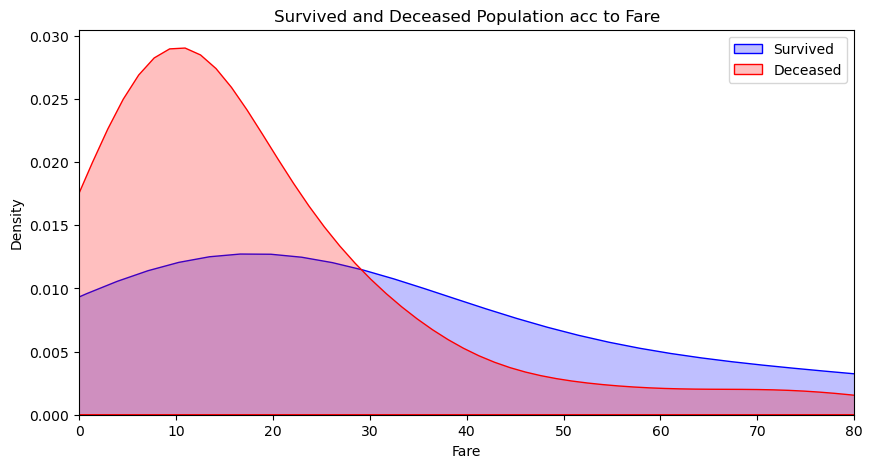

In [297]:
plt.figure(figsize=(10,5))
ax= sns.kdeplot(combined_titanic_data['Fare'][combined_titanic_data.Survived == 1], color= 'blue', shade=True)
sns.kdeplot(combined_titanic_data['Fare'][combined_titanic_data.Survived == 0], color='red', shade=True)
plt.show
plt.legend(['Survived', 'Deceased'])
plt.title('Survived and Deceased Population acc to Fare')
ax.set(xlabel='Fare')
plt.xlim(0, 80)
plt.show

/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_88115/421955541.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax= sns.kdeplot(combined_titanic_data['Sex_e'][combined_titanic_data.Survived == 1], color= 'blue', shade=True)
/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_88115/421955541.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_titanic_data['Sex_e'][combined_titanic_data.Survived == 0], color='red', shade=True)


<function matplotlib.pyplot.show(close=None, block=None)>

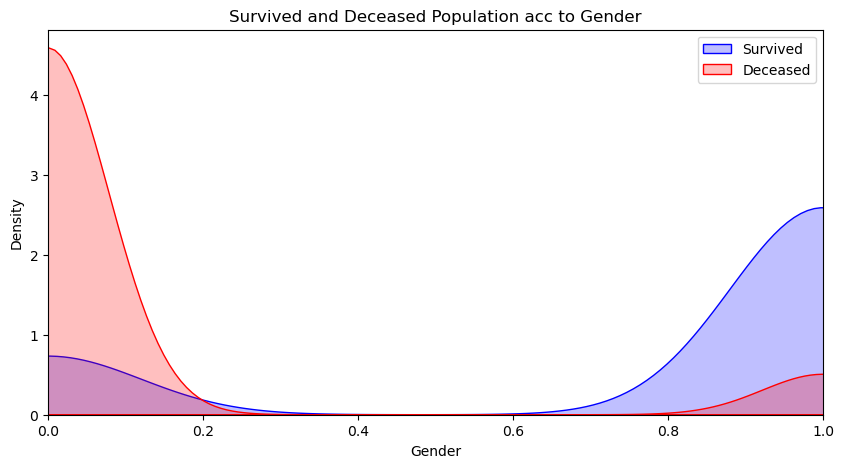

In [321]:
plt.figure(figsize=(10,5))
ax= sns.kdeplot(combined_titanic_data['Sex_e'][combined_titanic_data.Survived == 1], color= 'blue', shade=True)
sns.kdeplot(combined_titanic_data['Sex_e'][combined_titanic_data.Survived == 0], color='red', shade=True)
plt.show
plt.legend(['Survived', 'Deceased'])
plt.title('Survived and Deceased Population acc to Gender')
ax.set(xlabel='Gender')
plt.xlim(0, 1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

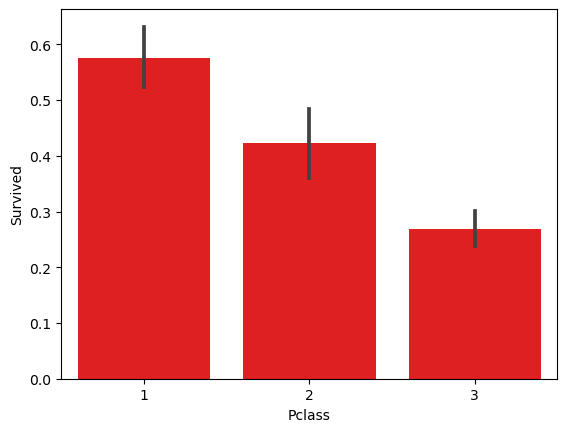

In [298]:
## check with barplot 
pclass_surv_barplot= sns.barplot(x='Pclass', y= 'Survived', data= combined_titanic_data, color='Red')
plt.show

In [300]:
## now I can start my testing
## 1st split the dataset acc to 'Survived' - move it to Y

X = combined_titanic_data.drop('Survived', axis=1)
Y = combined_titanic_data['Survived']


In [301]:
X.head()

,PassengerId,Pclass,Age,Fare,Sex_e,Young
0,1,3,22.0,7.2500,0,1
1,2,1,38.0,71.2833,1,1
2,3,3,26.0,7.9250,1,1
3,4,1,35.0,53.1000,1,1
4,5,3,35.0,8.0500,0,1


In [302]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [303]:
## train the model, based on 80% test size and 20% for training
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size= 0.2, random_state=32)

In [304]:
## check again if my assumptions make sense
print('X_train size is:', X_train.shape)
print('X_test size is:', X_test.shape)
print('Y_train size is:', Y_train.shape)
print('Y_test size is:', Y_test.shape)

X_train size is: (1047, 6)
X_test size is: (262, 6)
Y_train size is: (1047,)
Y_test size is: (262,)


In [305]:
## build a Logistic Regression Model - classification model

disaster_titanic_model= LogisticRegression()
disaster_titanic_model.fit(X_train, Y_train)

/Users/lalebaksi/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [306]:
## create my prediction
Y_pred_logress= disaster_titanic_model.predict(X_test)

In [307]:
## convert this prediction into dataframe
pred= pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_logress}) 

In [308]:
## check if correct
pred

,Actual,Predicted
872,0,0
270,0,0
987,1,1
1214,0,0
113,0,1
...,...,...
428,0,0
529,0,0
1,1,1
533,1,1


In [309]:
## check how this is performing for accuracy
logres_accuracy= accuracy_score(Y_test, Y_pred_logress)
logres_accuracy

0.8625954198473282

In [310]:
## my accuracy is 86% but let me check if there is overfitting
conf_logress_matrix= confusion_matrix(Y_test, Y_pred_logress)
conf_logress_matrix

array([[143,  13],
       [ 23,  83]])

In [ ]:
## what does this confusion matrix is telling me?
## 143 true negative and 83 true positive
## 143+13 = 156 = out of 156, 143 is predicted correctly and same is for the other
## so this model is working 

In [335]:
## my attempt to check classification scores of logistic regression with a different way;
## what to see true positive rate vs false positive rate 
fpr, tpr, thr = roc_curve(Y_test, Y_pred_logress)
print('Train/Test split results:')
print(disaster_titanic_model.__class__.__name__+'accuracy is %2.3f' % accuracy_score(Y_test, Y_pred_logress))
print(disaster_titanic_model.__class__.__name__+'log_loss is %2.3f' % log_loss(Y_test, Y_pred_logress))
print(disaster_titanic_model.__class__.__name__+ 'auc is %2.3f' % auc(fpr, tpr))



Train/Test split results:
LogisticRegressionaccuracy is 0.863
LogisticRegressionlog_loss is 4.953
LogisticRegressionauc is 0.850


In [312]:
## let's try Gaussian Naive Bayes model
NB_titanic= GaussianNB()
NB_titanic.fit(X_train, Y_train)

GaussianNB()

In [313]:
Y_pred_NB= NB_titanic.predict(X_test)

In [314]:
## convert my prediction to dataframe and check the actuals vs predictions
pred_NB= pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_NB})
pred_NB

,Actual,Predicted
872,0,0
270,0,0
987,1,1
1214,0,0
113,0,1
...,...,...
428,0,0
529,0,0
1,1,1
533,1,1


In [315]:
## check the accuracy of this model
NB_accuracy= accuracy_score(Y_test, Y_pred_NB)
NB_accuracy

0.8358778625954199

In [316]:
## my accuracy is 86% but let me check if there is overfitting
conf_NB_matrix= confusion_matrix(Y_test, Y_pred_NB)
conf_NB_matrix

array([[135,  21],
       [ 22,  84]])

In [ ]:
## confusion matrix is telling me my prediction is working